# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source:
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

### Question 1

#### Read the dataset

In [68]:
import pandas as pd

# Load the dataset (download or use a local path if available)
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv"
df = pd.read_csv(url)



#### Display the top 5 rows in the data

In [70]:
# Display the top 5 rows
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-10 05:22:12,33.93911,67.709953,53400,2264,43740,7396,Afghanistan,137.175124,4.239700
1,NaN,NaN,NaN,Albania,2021-01-10 05:22:12,41.15330,20.168300,63033,1233,37327,24473,Albania,2190.318994,1.956118
2,NaN,NaN,NaN,Algeria,2021-01-10 05:22:12,28.03390,1.659600,101913,2803,69011,30099,Algeria,232.407243,2.750385
3,NaN,NaN,NaN,Andorra,2021-01-10 05:22:12,42.50630,1.521800,8586,85,7724,777,Andorra,11112.405358,0.989984
4,NaN,NaN,NaN,Angola,2021-01-10 05:22:12,-11.20270,17.873900,18156,416,13205,4535,Angola,55.242049,2.291254


#### Show the information of the dataset

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4012 entries, 0 to 4011
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3265 non-null   float64
 1   Admin2               3270 non-null   object 
 2   Province_State       3834 non-null   object 
 3   Country_Region       4012 non-null   object 
 4   Last_Update          4012 non-null   object 
 5   Lat                  3923 non-null   float64
 6   Long_                3923 non-null   float64
 7   Confirmed            4012 non-null   int64  
 8   Deaths               4012 non-null   int64  
 9   Recovered            4012 non-null   int64  
 10  Active               4012 non-null   int64  
 11  Combined_Key         4012 non-null   object 
 12  Incident_Rate        3923 non-null   float64
 13  Case_Fatality_Ratio  3963 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 438.9+ KB


#### Show the sum of missing values of features in the dataset

In [72]:
df.isnull().sum()

,0
FIPS,747
Admin2,742
Province_State,178
Country_Region,0
Last_Update,0
Lat,89
Long_,89
Confirmed,0
Deaths,0
Recovered,0


### Question 2

#### Show the number of Confirmed cases by Country

In [74]:
df.groupby("Country_Region")["Confirmed"].sum().sort_values(ascending=False)


,Confirmed
Country_Region,
US,22403255
India,10450284
Brazil,8081091
Russia,3344175
United Kingdom,3026299
...,...
Palau,0
Tonga,0
Summer Olympics 2020,0


#### Show the number of Deaths by Country

In [75]:
df.groupby("Country_Region")["Deaths"].sum().sort_values(ascending=False)


,Deaths
Country_Region,
US,377679
Brazil,202769
India,150999
Mexico,133204
United Kingdom,103663
...,...
Timor-Leste,0
Tonga,0
Tuvalu,0


#### Show the number of Recovered cases by Country

In [76]:
df.groupby("Country_Region")["Recovered"].sum().sort_values(ascending=False)


,Recovered
Country_Region,
India,10075950
Brazil,7205410
Russia,2726336
Turkey,2190047
Colombia,1609564
...,...
Summer Olympics 2020,0
Tonga,0
Tuvalu,0


#### Show the number of Active Cases by Country

In [78]:
df["Active"] = df["Confirmed"] - df["Deaths"] - df["Recovered"]
df.groupby("Country_Region")["Active"].sum().sort_values(ascending=False)


,Active
Country_Region,
US,22025576
United Kingdom,2915781
France,2549059
Spain,1848110
Netherlands,855321
...,...
Summer Olympics 2020,0
Vanuatu,0
Tuvalu,0


#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [82]:
# Group and summarize
latest_summary = df.groupby("Country_Region")[["Confirmed", "Deaths", "Recovered", "Active"]].sum()

# Sort by Confirmed
latest_summary = latest_summary.sort_values(by="Confirmed", ascending=False)

# Show top 10 countries
latest_summary.head(10)

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
US,22403255,377679,0,22025576
India,10450284,150999,10075950,223335
Brazil,8081091,202769,7205410,672912
Russia,3344175,60523,2726336,557316
United Kingdom,3026299,103663,6855,2915781
France,2824882,67733,208090,2549059
Turkey,2317118,22631,2190047,104440
Italy,2257866,78394,1606630,572842
Spain,2050360,51874,150376,1848110


### Question 3

### Show the countries with no recovered cases

In [81]:
# Filter countries with zero recovered cases
no_recovery = latest_summary[latest_summary["Recovered"] == 0]

# Sort by Confirmed cases
no_recovery = no_recovery.sort_values(by="Confirmed", ascending=False)

# Display result
no_recovery.head(10)

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
US,22403255,377679,0,22025576
Belgium,662694,20038,0,642656
Sweden,489471,9433,0,480038
Serbia,356125,3513,0,352612
Antarctica,0,0,0,0
Nauru,0,0,0,0
"Korea, North",0,0,0,0
Kiribati,0,0,0,0
Palau,0,0,0,0


#### Show the countries with no confirmed cases

In [80]:
# Filter countries with zero confirmed cases
no_confirmed = latest_summary[latest_summary["Confirmed"] == 0]

# Display result
no_confirmed

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Antarctica,0,0,0,0
Nauru,0,0,0,0
"Korea, North",0,0,0,0
Kiribati,0,0,0,0
Palau,0,0,0,0
Tonga,0,0,0,0
Summer Olympics 2020,0,0,0,0
Tuvalu,0,0,0,0
Winter Olympics 2022,0,0,0,0


#### Show the countries with no deaths

In [83]:
# Filter countries with zero deaths
no_deaths = latest_summary[latest_summary["Deaths"] == 0]

# Display result
no_deaths

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Cambodia,391,0,371,20
Saint Vincent and the Grenadines,225,0,100,125
Dominica,106,0,98,8
Timor-Leste,49,0,40,9
Laos,41,0,40,1
Saint Kitts and Nevis,34,0,31,3
Holy See,27,0,15,12
Solomon Islands,17,0,10,7
Marshall Islands,4,0,4,0


### Question 4

#### Show the Top 10 countries with Confirmed cases

In [84]:
# Top 10 countries by confirmed cases
top10_confirmed = latest_summary.sort_values(by="Confirmed", ascending=False).head(10)

# Display result
top10_confirmed

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
US,22403255,377679,0,22025576
India,10450284,150999,10075950,223335
Brazil,8081091,202769,7205410,672912
Russia,3344175,60523,2726336,557316
United Kingdom,3026299,103663,6855,2915781
France,2824882,67733,208090,2549059
Turkey,2317118,22631,2190047,104440
Italy,2257866,78394,1606630,572842
Spain,2050360,51874,150376,1848110


#### Show the Top 10 Countries with Active cases

In [85]:
# Get top 10 countries by active cases
top10_active = latest_summary.sort_values(by="Active", ascending=False).head(10)

# Display result
top10_active

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
US,22403255,377679,0,22025576
United Kingdom,3026299,103663,6855,2915781
France,2824882,67733,208090,2549059
Spain,2050360,51874,150376,1848110
Netherlands,878443,12406,10716,855321
Brazil,8081091,202769,7205410,672912
Belgium,662694,20038,0,642656
Italy,2257866,78394,1606630,572842
Russia,3344175,60523,2726336,557316


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [86]:
import matplotlib.pyplot as plt

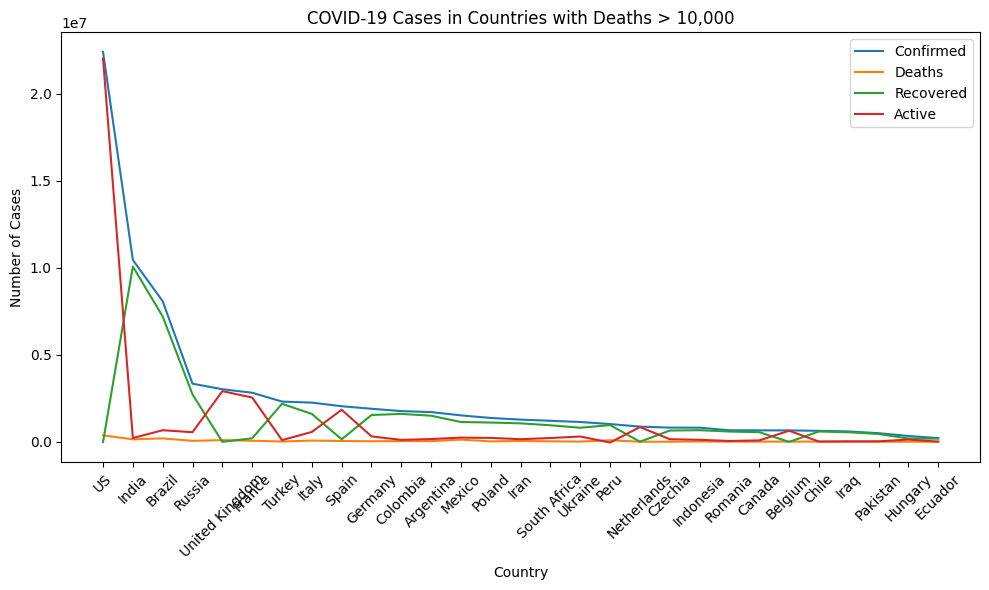

In [89]:
# Filter countries with more than 10,000 deaths
high_death_countries = latest_summary[latest_summary["Deaths"] > 10000]

# Plot line graph
plt.figure(figsize=(10, 6))
for column in ["Confirmed", "Deaths", "Recovered", "Active"]:
    plt.plot(high_death_countries.index, high_death_countries[column], label=column)

plt.title("COVID-19 Cases in Countries with Deaths > 10,000")
plt.xlabel("Country")
plt.ylabel("Number of Cases")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Question 6

### Plot Province/State wise Deaths in USA

In [90]:
import plotly.express as px

In [91]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-09-2021.csv')

In [92]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incident_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [94]:

# Filter USA data
usa_data = covid_data[covid_data["Country_Region"] == "US"]

# Group by Province/State and sum deaths
state_deaths = usa_data.groupby("Province_State")["Deaths"].sum().reset_index()

# Plot with Plotly
fig = px.bar(state_deaths, x="Province_State", y="Deaths",
             title="COVID-19 Deaths by State in USA (Jan 9, 2021)",
             labels={"Deaths": "Number of Deaths", "Province_State": "State"},
             color="Deaths", color_continuous_scale="Reds")

fig.update_layout(xaxis_tickangle=-45)
fig.show()

### Question 7

### Plot Province/State Wise Active Cases in USA

In [98]:
covid_data["Confirmed"] = covid_data["Confirmed"].fillna(0)
covid_data["Deaths"] = covid_data["Deaths"].fillna(0)
covid_data["Recovered"] = covid_data["Recovered"].fillna(0)
covid_data["Active"] = covid_data["Confirmed"] - covid_data["Deaths"] - covid_data["Recovered"]

usa_data = covid_data[covid_data["Country_Region"] == "US"]
state_active = usa_data.groupby("Province_State")["Active"].sum().reset_index()

fig = px.bar(state_active, x="Province_State", y="Active",
             title="COVID-19 Active Cases by State in USA (Jan 9, 2021)",
             labels={"Active": "Active Cases", "Province_State": "State"},
             color="Active", color_continuous_scale="Blues")

fig.update_layout(xaxis_tickangle=-45)
fig.show()









### Question 8

### Plot Province/State Wise Confirmed cases in USA

In [99]:
covid_data["Confirmed"] = covid_data["Confirmed"].fillna(0)

usa_data = covid_data[covid_data["Country_Region"] == "US"]
state_confirmed = usa_data.groupby("Province_State")["Confirmed"].sum().reset_index()

fig = px.bar(state_confirmed, x="Province_State", y="Confirmed",
             title="COVID-19 Confirmed Cases by State in USA (Jan 9, 2021)",
             labels={"Confirmed": "Confirmed Cases", "Province_State": "State"},
             color="Confirmed", color_continuous_scale="Oranges")

fig.update_layout(xaxis_tickangle=-45)
fig.show()









### Question 9

### Plot Worldwide Confirmed Cases over time

In [100]:

import plotly.express as px
import plotly.io as pio

# Define dates leading up to Jan 9, 2021
dates = ["01-03-2021", "01-04-2021", "01-05-2021", "01-06-2021",
         "01-07-2021", "01-08-2021", "01-09-2021"]

all_data = []

for date in dates:
    url = f"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{date}.csv"
    try:
        df = pd.read_csv(url)
        df["Date"] = date
        all_data.append(df)
    except:
        continue

# Combine all data
df_all = pd.concat(all_data)
df_all["Confirmed"] = df_all["Confirmed"].fillna(0)

# Group by date and sum Confirmed cases
worldwide_trend = df_all.groupby("Date")["Confirmed"].sum().reset_index()

# Plot line chart
fig = px.line(worldwide_trend, x="Date", y="Confirmed",
              title="Worldwide Confirmed COVID-19 Cases (Jan 3–9, 2021)",
              labels={"Confirmed": "Confirmed Cases", "Date": "Date"})

pio.show(fig)
